![header](header.png)

In this article we're gonna cover a lot of ground. So far we have seen that functions can be used to encapsulate tasks we want to perform throughout our programs. They take some input, perform some computation, and then give us an output. We're now going to explore a number of powerful concepts involving functions, culminating in a brief discussion of functional programming, a programming paradigm that is quite different to the methodology we have used so far.

## First-class objects

We've not got around to a proper discussion of objects yet. But they're all around us. A number is an object, a string is an object, a list is an object. Basically anything you can assign to a variable or pass to a function or get out of a function is an object.

Well, turns out functions are objects too. You can assign functions to variables, use functions as arguments to functions, and even return functions from functions.

We've actually briefly seen this before. In a previous video, we used the <code>max()</code> function to determine the maximum entry of a dictionary <i>by value</i> rather than by key. For this, we had to pass the <code>get</code> function to <code>max</code>, which gets the value from the key, to make the <code>max()</code> function behave in this way.

Some of the concepts here will be based on this possibly surprising fact about functions.

## Recursion

An interesting fact about functions is that they can be called within their own definitions. This is useful for a surprising number of algorithms, and can sometimes lead to nicer code than loops. Just like with while-loops though, you have to make sure there is some point at which the functions stop calling and start returning values! This is called the "base case". A recursive function calls itself until it reaches the base case.

In [9]:
def fib(n):
    # get the nth fibonacci number
    if n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
fib(30)

514229

The deal with recursion is that some problems are the sum of several smaller problems of the same kind. For example, a lot of searching problems, where we are searching for some item in a structure such as a file system, network or list, can be conceived of as searching through many sub-structures within that structure. For instance, searching for a file in a directory involves searching through sub-directories of that directory, which involves searching through sub-directories of the sub-directories, and so on. This task can be accomplish with a recursive algorithm.

### Exercises

1. Look up the binary search algorithm and write a recursive function to implement it.
2. (Mathematical, challenging) Laplace's algorithm for finding the determinant of a square matrix is recursive. Write a function that can take a square matrix as a list of lists and find its determinant using the recursive Laplace algorithm.

## Lambda expressions

Functional programming is based on the formal mathematical system called the lambda calculus. A vestige of this origin lives on in so-called lambda expressions. This somewhat intimidating-sounding name is actually very simple. As one of the Python developers once said, if lambda were called "makefunction", no one would be confused. A lambda expression is essentially a function that consists solely of one or more inputs, followed by a return statement, all written on one line. Here is a simple lambda expression that squares a number:

In [10]:
lambda x : x**2

<function __main__.<lambda>>

This is a complete description of a function. The variable <code>x</code> goes in, <code>x**2</code> comes out. The function consists of a single return expression. There can be no variable assignments or references; the function is solely defined by input and output. The function has no name attached to it, but it can still be assigned to a variable:

In [22]:
square = lambda x : x**2
print(square(10))

100


In [42]:
power = lambda x, n: x**n
power(5, 3)

125

So, why lambdas? Sometimes, it's just quicker and easier to use lambdas. Suppose I want a function that tells me the number of digits in an integer:

In [14]:
digits = lambda x: len(str(x))

In [15]:
digits(4343452)

7

Another primary use case is for functions that take a function as an argument, but the function you want to pass is too simple to be worth building separately.

Suppose I have a list of 2d vectors, represented as pairs of numbers. The norm of a vector $(a, b)$ is given by the Pythagorean formula $\sqrt{a^2 + b^2}$. We wish to find the vector with the largest norm.

In [33]:
# first make some random vectors
from random import uniform
vectors = [(uniform(-50, 50), uniform(-50, 50)) for x in range(20)]

In [38]:
# find vector with largest norm:
largest = max(vectors, key= lambda v: (v[0]**2 + v[1]**2)**0.5)
print(largest)

(-45.3519046167027, 47.28755575244766)


Recall that the <code>key</code> argument provided to the <code>max()</code> function tells <code>max()</code> what method to use to measure the maximum. It must be a function. But instead of defining the function using the normal syntax, it was quicker and easier to write a little lambda function in that argument slot. The <code>.sort()</code> method that can be applied to lists can also take a key argument, so lambda expressions can be useful here too. 

### Exercises

Write a lambda function that acts as an XOR logical operator. XOR stands for "exclusively or", and evaluates to true only when one of its arguments is true, but the other isn't. "One, the other, but not both". In other words, correctly define the XOR variable using a lambda function in this example so that the code runs:


In [52]:
#XOR = your lambda expression here
print(XOR(True, True))
print(XOR(False, True))
print(XOR(True, False))
print(XOR(False, False))

False
True
True
False


(Challenge) Write a lambda function that returns a new lambda function for raising an input to a chosen power. Again, correctly define the following variable so that the code runs:

In [50]:
# raiseto = your lambda here
square = raiseto(2)
print(square(5))
cube = raiseto(3)
print(cube(5))
invert = raiseto(-1)
print(invert(5))

25
125
0.2


## \*args and \**kwargs

In the introduction to functions, we saw that we had a choice between using positional arguments, and keyword arguments.

Sometimes we may want a function that can take arbitrary collections of arguments. For instance, the <code>max()</code> can take an arbitrary number of positional arguments before accepting a keyword argument:

In [ ]:
# the abs() function gives the number's absolute value -- in this case, ignores the minus sign
print(max(1, -5, 3, 4, -2, key=abs))

Our own functions can match this behaviour, using a <code>\*</code> symbol. A function parameter with a <code>\*</code> at the beginning is understood to be a sequence of arguments of an unknown length.

In [2]:
def number_my_sequence(*seq):
    for i, thing in enumerate(seq):
        print("{}. {}".format(i+1, thing))
        
number_my_sequence("Apples", "Bananas", "Pears")

1. Apples
2. Bananas
3. Pears


There is something of an opposite notion; when calling a function, if an argument is preceded by the <code>\*</code>, then if it is sequence-like, it will be "unpacked" before the function is called. Look carefully at the example. The <code>adder</code> function takes two arguments. We pass it just one argument, which is a sequence with two elements to be unpacked to form the two arguments:

In [3]:
def adder(a, b):
    return a + b
numbers = [5, 6]
print(adder(*numbers))

11


There is an equivalent syntax for keyword arguments. A <code>\*\*</code> added to the beginning of a parameter means that the keyword arguments provided here will be expanded to a dictionary:

In [5]:
def kwarg_example(**things):
    print(things)
    
kwarg_example(name="Sam", working_with="HiPy")

{'name': 'Sam', 'working_with': 'HiPy'}


The reverse syntax also applies as above, in that a dictionary can be expanded into keyword arguments with keys as keywords and values as arguments.

## Iterators and generators

A brief bit of theoretical woffle before we get to the upshot. You have probably noticed that for-loops can be used on many different kinds of objects, such as ranges, lists, strings, tuples, dictionaries, and many others. Objects that can be looped over are called "iterable".  When placed in the context of a for-loop, they become an iterator, which means they know what to do each time the for-loop asks for the next item. We can actually do this manaully. Firstly, observe that at first, Python does not know what "next" means in terms of a string:

In [54]:
pythonclub = "HiPy"
print(next(pythonclub))

TypeError: 'str' object is not an iterator

However, we can ask the string to give us an iterator:

In [55]:
iterclub = iter(pythonclub)

Now we can ask for the next value:

In [56]:
print(next(iterclub))

H


In [57]:
print(next(iterclub))

i


In [58]:
print(next(iterclub))

P


In [59]:
print(next(iterclub))

y


In [60]:
print(next(iterclub)) # we're out of letters!

StopIteration: 

So what a for-loop does is ask the object (string, list, range, etc) we provide for an iterator, and then use next on the object until it runs out.

We'll discuss this point in more detail when we discuss object-oriented programming. But for now, in our discussion of functions, we can make a special kind of function that is iterable. In other words, the function can give a sequence of different outputs when placed in the context of a for-loop. A generator looks exactly like a normal function, but instead of the word <code>return</code> returning a value, the word <code>yield</code> is used instead. When the generator "yields" something, it stops until something asks it for the next value, in which case, it picks up exactly where it left off!

In [67]:
from random import randint # for random integers
def random_numbers(count, low=0, high=100):
    for i in range(count):
        yield randint(low, high) 

In [68]:
for x in random_numbers(10):
    print("Next number is",x)
    

Next number is 68
Next number is 72
Next number is 88
Next number is 0
Next number is 47
Next number is 36
Next number is 73
Next number is 52
Next number is 95
Next number is 3


The <code>enumerate()</code> function we met in the previous article on Flow Control is somewhat equivalent to:

In [2]:
def fake_enumerate(seq):
    for i in range(len(seq)):
        yield i, seq[i]
        
shopping = ["Chickpeas", "Onions", "Flatbread"]

for k, grocery in fake_enumerate(shopping):
    print("{}. {}".format(k+1, grocery))

1. Chickpeas
2. Onions
3. Flatbread


Notice, inside the generator there is a for-loop, but one that can be put on pause until the <i>outer</i> for-loop (<code>for k, grocery in fake_enumerate(shopping):</code>) asks it to carry on. This is quite mindbending, but it can be useful. In the example, we use a generator to convert some real genetic data from a text file into a more Python-friendly format.

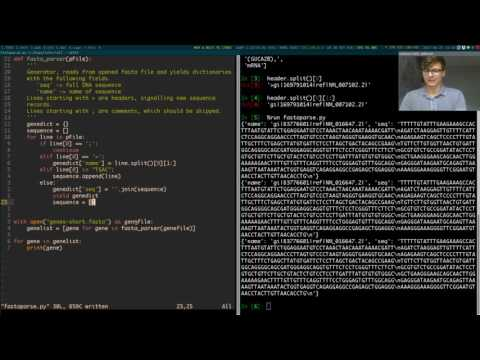

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("M-brh-eFgyE")

## Functional Programming

Here, we will just introduce the very basic concept of functional programming, as something to chew over and consider in your own program designs. So far, what we have been doing is what is called <i>imperative</i> programming. The program has a state, which means it holds some things in memory, usually in the form of variables, and we proceed by updating the program's state by changing these variables, reassigning them, and so on. At the top of this article, we used recursion to find the $n$th fibonacci number. Let's now do it in a pure imperative style:

In [69]:
n = 30
for k in range(n):
    if k < 2:
        x = 0
        y = 1
    else:
        # to understand this line, remember that when assigning variables
        # the right hand side is fully evaulated before being assigned to the LHS
        x, y = y, x + y
print(y)
        

514229


This program achieves the same task, but we first set n to something. Then we iterate over k, and for each k, update two variables x and y. At each pass through the loop, the state of the program is changed; k, x, and y are all modified\*. That is imperative programming in a nutshell.

While imperative programming is easy to get going with, it's also easy to get in a tangle with. Because different functions are constantly referring to and altering different parts of a (large) program's state, it's very easy for errors to occur because some part of the program's state is wrong at the time a particular function or operation is executed.

Functional programming aims to fix this by encouraging a very different style of design. Functional programming demands that we make our functions behave like <i>mathematical</i> functions, in that there is one, and only one, possible output for each input to a function. In imperative programming, the function may behave differently at different times with the same inputs, because the program's state is different at those different times. Moreover, the function may alter the program's state, which can cause other functions to behave differently at a later time. This is the concept of "side-effects".

In functional programming, the program does not have a state. It has functions, which behave in exactly the same way every time they are called with the same inputs, guaranteed. Each function has an input, and an output, and nothing that goes on inbetween can have any effect on, or be affected by, the rest of the program's behaviour. Check out the recursive fibonacci program; there's not a variable in sight. Just functions taking inputs and returning values. This leads to essentially bug-free code, so long as the functions are correctly defined and applied in the correct order. 

Functional programming isn't easy, but Python does have some support to make it easier via the <code>functools</code> module. While some programming languages are purely functional, Python is multi-paradigm, and the good thing about functional programming in Python is it needn't be all or nothing. It can fit around the rest of your program design. After all, the whole point of functional programming is "no side effects"! Thus if you find that you <i>can</i> solve one of your problems by writing a function that neither affects nor is affected by the program's state, but only by its input values, then why not go ahead and do it that way, reaping some of the benefits of functional programming as you do?

For some specific examples of functional programming techniques in Python, see this article https://maryrosecook.com/blog/post/a-practical-introduction-to-functional-programming
Note that the examples are in Python 2, which means <code>print()</code> does not need the brackets. Also, the author uses <code>map()</code>, <code>filter</code> a lot; in Python 3 it is generally considered preferable to use list comprehensions to perform the same task.

\* This is a subtle point about for-loops easily missed. The variable that gets bound at the start of each pass through, such as the <code>x</code> appearing in the line <code>for x in range(10)</code>, remains assigned even after the loop is finished running. Therefore, as far as functional programming goes, it constitutes a side-effect -- the state of the program is changed. The same is not true of the "for loops" found in list comprehensions; these are side-effect free.